# **Masking  data outside the Gulf of Mexico** 
- **Code written by: Billy Atkinson (watkinson@umces.edu)** 
- **Date of Last Revision: 08/11/2022** 
- **This code reads in the HYCOM ADT data and masks out the values outside of the Gulf of Mexico using two straight lines** 
    - **One line runs from Cancun to southern tip of Florida and the other runs from the tip of southern Florida to a point in the U.S.**

# Packages needed for masking output and loading data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
import xarray as xr
import pandas as pd
import glob
import os

# Load in data that will be masked
    Example is for  March 9, 2006

In [7]:
ssh_files = sorted(glob.glob('/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_200*.nc'))#load in list of file paths
#ssh_files = ssh_files[0:1]
#dir = "/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/"
#SSH_data = xr.open_dataset(dir + "hycom_gomu_501_2006030900_t000.nc")
#SSH_data

# Plot the current output of SSH data

Text(0.5, 0, 'SSH (m)')

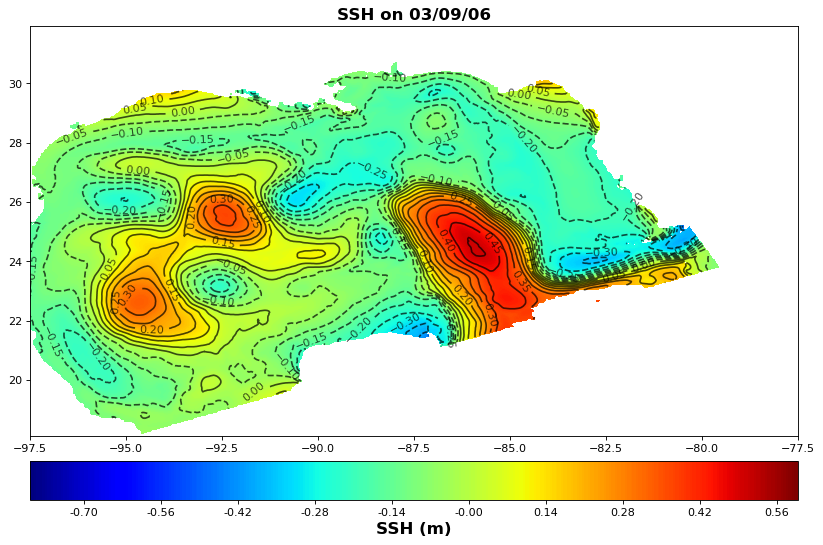

In [9]:
#create axes and figure parameters
fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_axes([.03,.03,.8,.8])
ax.set_xlim(-97.5, -77.5)
plt.title('SSH on 03/09/06',loc='center',fontsize=15,fontweight='bold')
SSH_data = xr.open_dataset('/data/watkinson/Fall2022/SSH_data/Cropped_SSH_Data/hycom_gomu_501_20050101_cropped.nc')
#load in lat, lon and SSH data for plot 
lat = SSH_data.lat
lon = SSH_data.lon
ssh = SSH_data.adt

#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)

#plot with contourf and contour functions
cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(-.8,.6,400))
cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(-.8,.6,.05))
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')

# Create function that computes the slope and y-intecept of a line

In [5]:
def slope_intercept(x1,y1,x2,y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - (m * x1)    
    return m,b

# Apply custom mask to SSH data
> Line 1: lat = .3732(lon) + 53.49    
> Line 2: lat = -1.746(lon) - 115.1

In [8]:
for i in ssh_files:
    SSH_data = xr.open_dataset(i)
    lon = SSH_data.lon
    lat = SSH_data.lat
    adt = SSH_data.adt[:,:,0]
    #call function to calculate slope and y intercept for two seperate lines used to mask
    m1,b1 = slope_intercept(-86.846502,21.077478,-79.541586,23.803416)
    m2,b2 = slope_intercept(-79.541586,23.803416,-85.266082,33.802249)
    #mask using line 1
    adt_mask = ma.masked_where((lat < (m1 * lon) + b1), adt)
    #mask using line 2
    adt_mask = ma.masked_where((lat > (m2 * lon) + b2), adt_mask)
    ma.set_fill_value(adt_mask,np.nan)
    SSH_data['adt'][:,:,0] = adt_mask
    date = os.path.basename(i)[15:23]
    dir = '/data/watkinson/Fall2022/SSH_data/Cropped_SSH_Data'
    SSH_data.to_netcdf(dir + '/hycom_gomu_501_' + date + '_cropped.nc','w')

# Plot the original SSH data and the masked SSH data to review results

Text(0.5, 0, 'SSH (m)')

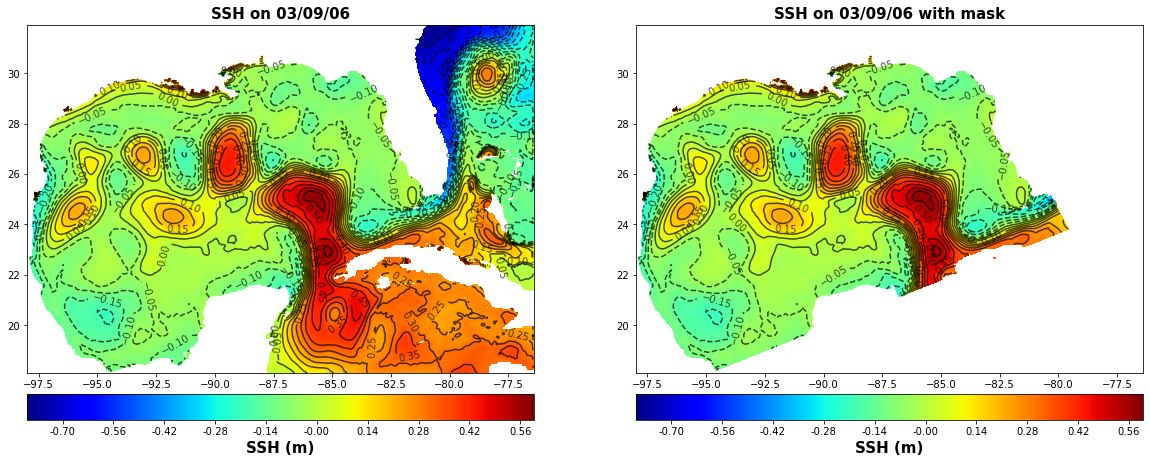

In [23]:
#create xes and figure parameters
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.set_title('SSH on 03/09/06',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('SSH on 03/09/06 with mask',loc='center',fontsize=15,fontweight='bold')
#load in lat, lon and SSh data for plot
lat=SSH_data.lat
lon=SSH_data.lon
ssh = SSH_data.adt

#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)
#plot original SSH using contourf and contour
cf = ax1.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(-.8,.6,400))
cl = ax1.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(-.8,.6,.05))
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,ax=ax1,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')

#plot masked SSH using contourf and contour
cf2 = ax2.contourf(lon2d,lat2d,adt_mask,cmap='jet',levels=np.linspace(-.8,.6,400))
cl2 = ax2.contour(lon2d,lat2d,adt_mask,colors='k',alpha=.7,levels=np.arange(-.8,.6,.05))
plt.clabel(cl2, inline=1, fontsize=10)
cbar = fig.colorbar(cf2,ax=ax2,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')